# GradientBoosting

In [1]:
import pandas as pd
train = pd.read_csv('../../../dataset/german_credit_train.csv')
train.head()

,Unnamed: 0,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,239,39,male,2,own,little,little,2522,30,radio/TV,good
1,304,44,male,2,free,quite rich,NaN,10127,48,car,bad
2,964,22,male,1,own,little,moderate,454,6,repairs,good
3,102,24,female,2,own,little,NaN,932,6,radio/TV,good
4,867,42,male,2,own,little,NaN,3331,12,furniture/equipment,good


In [2]:
df = train.drop(columns=['Unnamed: 0','risk'])
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
0,39,male,2,own,little,little,2522,30,radio/TV
1,44,male,2,free,quite rich,NaN,10127,48,car
2,22,male,1,own,little,moderate,454,6,repairs
3,24,female,2,own,little,NaN,932,6,radio/TV
4,42,male,2,own,little,NaN,3331,12,furniture/equipment


In [3]:
y_train = train['risk']

### Transformando dados categóricos em numéricos

In [4]:
cleanup_nums = {"savingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)

In [5]:
cleanup_nums = {"checkingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)

In [6]:
d_attr = pd.get_dummies(df[['sex','housing','purpose']], prefix=['sex','housing','purpose'])

In [7]:
print(d_attr.shape)
print(df.shape)

(900, 13)
(900, 9)


In [8]:
df = pd.concat([df, d_attr], axis=1)

In [9]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,sex_female,...,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,39,male,2,own,1.0,1.0,2522,30,radio/TV,0,...,1,0,0,0,0,0,0,1,0,0
1,44,male,2,free,3.0,NaN,10127,48,car,0,...,0,0,0,1,0,0,0,0,0,0
2,22,male,1,own,1.0,2.0,454,6,repairs,0,...,1,0,0,0,0,0,0,0,1,0
3,24,female,2,own,1.0,NaN,932,6,radio/TV,1,...,1,0,0,0,0,0,0,1,0,0
4,42,male,2,own,1.0,NaN,3331,12,furniture/equipment,0,...,1,0,0,0,0,0,1,0,0,0


In [10]:
df.shape

(900, 22)

In [11]:
df.columns

Index(['age', 'sex', 'job', 'housing', 'savingAccount', 'checkingAccount',
       'creditAmount', 'duration', 'purpose', 'sex_female', 'sex_male',
       'housing_free', 'housing_own', 'housing_rent', 'purpose_business',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others'],
      dtype='object')

In [12]:
df = df[['age', 'savingAccount', 'checkingAccount',
       'creditAmount', 'duration', 'sex_female', 'sex_male',
       'housing_free', 'housing_own', 'housing_rent', 'purpose_business',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others']]

In [13]:
df.shape

(900, 18)

### Tratamento dos valores missing - atribuindo o valor mais frequente para os valores missing
savingAccount = 1 e checkingAccount = 1

In [14]:
df = df.fillna(1)
df.head()

,age,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,39,1.0,1.0,2522,30,0,1,0,1,0,0,0,0,0,0,1,0,0
1,44,3.0,1.0,10127,48,0,1,1,0,0,0,1,0,0,0,0,0,0
2,22,1.0,2.0,454,6,0,1,0,1,0,0,0,0,0,0,0,1,0
3,24,1.0,1.0,932,6,1,0,0,1,0,0,0,0,0,0,1,0,0
4,42,1.0,1.0,3331,12,0,1,0,1,0,0,0,0,0,1,0,0,0


### Escolhendo os melhores hiperparâmetros para o GradientBoosting

In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

min_estimators = 100
max_estimators = 5000
step = 100
result = []
for i in range(min_estimators, max_estimators+step, step):
    clf = GradientBoostingClassifier(n_estimators=i)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(clf, df, y_train, cv=5, scoring=s)
    result.append((i, scores.mean()))

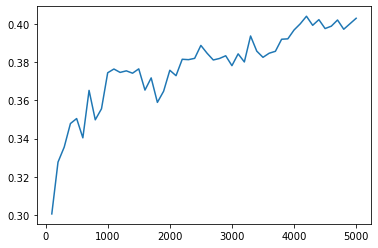

In [16]:
import matplotlib.pyplot as plt
plt.plot(*zip(*result))

In [17]:
max(result,key=lambda item:item[1])

(4200, 0.40403161816512123)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=4200)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(clf, df, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(clf, df, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

[[172 100]
 [247 381]]
              precision    recall  f1-score   support

         bad       0.41      0.63      0.50       272
        good       0.79      0.61      0.69       628

    accuracy                           0.61       900
   macro avg       0.60      0.62      0.59       900
weighted avg       0.68      0.61      0.63       900

